In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


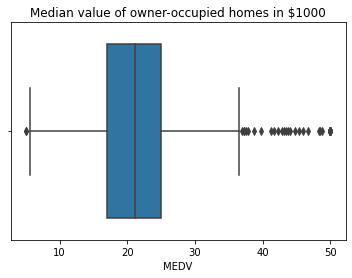

In [4]:
sns.boxplot(boston_df['MEDV'], data = boston_df)
plt.title("Median value of owner-occupied homes in $1000")
plt.show()

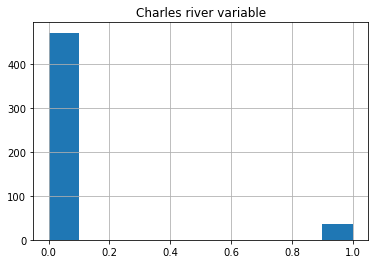

In [5]:
boston_df['CHAS'].hist()
plt.title('Charles river variable')
plt.show()

In [6]:
#categorize
boston_df.loc[(boston_df['AGE'] < 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] > 70), 'age_group'] = '70 years and older'

In [7]:
boston_df.age_group

0      between 35 and 70 years
1           70 years and older
2      between 35 and 70 years
3      between 35 and 70 years
4      between 35 and 70 years
                ...           
501    between 35 and 70 years
502         70 years and older
503         70 years and older
504         70 years and older
505         70 years and older
Name: age_group, Length: 506, dtype: object

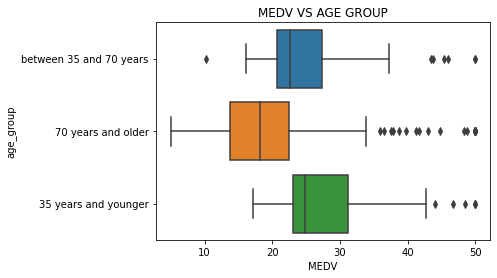

In [8]:
# medv vs age group
sns.boxplot(x = 'MEDV', y = 'age_group', data = boston_df)
plt.title("MEDV VS AGE GROUP")
plt.show()

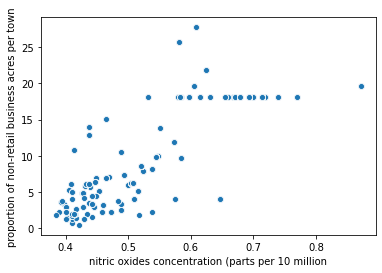

In [9]:
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)
plt.xlabel('nitric oxides concentration (parts per 10 million')
plt.ylabel('proportion of non-retail business acres per town')
plt.show()

There is a linear relationship between nitric oxides concentration and proportion of non-retail business

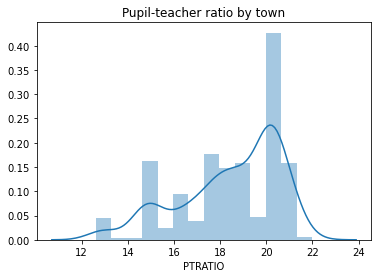

In [10]:
sns.distplot(boston_df['PTRATIO'])
plt.title('Pupil-teacher ratio by town')
plt.show()

# Statistical Testing

In [11]:
import scipy.stats

### 1. Effect Charles river in median value of houses

Hypothesis:
1. Charles river has no effect in median prices of houses
2. Charles river has an effect in median prices of houses.

In [12]:
np.unique(boston_df['CHAS'])

array([0., 1.])

In [13]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                       boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

p-value is < 0.05 so, Charles river has an effect in median value of houses

### 2. MEDIAN VALUE OF HOUSE VS AGE

Hypothosis
1. the three population means are equal)
2. At least one of the means differ

In [15]:
np.unique(boston_df['age_group'])

array(['35 years and younger', '70 years and older',
       'between 35 and 70 years'], dtype=object)

In [16]:

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                  center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [17]:
# group into categories
thirtyFiveLower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thiryFiveToSeventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventyAbove = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
                            

In [18]:
# One way anova
fstatistic, p_value = scipy.stats.f_oneway(thirtyFiveLower, thiryFiveToSeventy, seventyAbove)

In [19]:
print("F_statistic: {0}, p-value : {1}".format(fstatistic, p_value))

F_statistic: 36.40764999196599, p-value : 1.7105011022702984e-15


Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### 3. Nitric oxide concentrations VS proportion of non-retail business acres per town

Hypothesis:

1. There no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

2. There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [20]:
# PEARSON Corr
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

Since the p-value  < 0.05, we reject the Null hypothesis and conclude that there exists a There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town

### 4. impact of an additional weighted distance  to the five Boston employment centres on the median value of Houses

Hypothesis:

1. Additional weighted ditance has no impact on median value of house  𝐻0:β1  = 0

2. Additional weighted ditance has no impact on median value of house 𝐻1:β1  is not equal to 0

In [22]:
import statsmodels.api as sm

In [24]:
X = boston_df['DIS']
y = boston_df['MEDV']

X =  sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 01 Jan 2021   Prob (F-statistic):           1.21e-08
Time:                        21:17:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is less than .05 so weighted distance  to the five Boston employment centres has an impact on the median value of House